<a href="https://colab.research.google.com/github/EncodingDavid/tensorflow/blob/master/tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 345.2MB 54kB/s 


In [3]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [0]:
import seaborn

In [5]:
print(seaborn.__version__)

0.9.0


In [0]:
from tensorflow import keras
from tensorflow.keras import layers

# 数据集下载

In [0]:
from __future__ import absolute_import,division,print_function
import pathlib
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [6]:

dataset_path = keras.utils.get_file("auto-mpg.data","https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path 

32768/30286 [================================] - 0s 1us/step


'/root/.keras/datasets/auto-mpg.data'

In [7]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                  'Acceleration','Model Year','Origin']
raw_dataset = pd.read_csv(dataset_path,names=column_names,
                          na_values = "?",comment='\t',
                          sep=" ",skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [8]:
dataset.isna().sum()


MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [9]:
dataset = dataset.dropna()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [0]:
origin = dataset.pop('Origin')#删除Origin列

In [11]:
dataset['USA'] = (origin==1)*1.8
dataset['Europe'] = (origin==2)*1.8
dataset['China'] = (origin==3)*1.8
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,China
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.8,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.8,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.8,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.8,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.8,0.0,0.0


# 划分数据集和训练集

In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

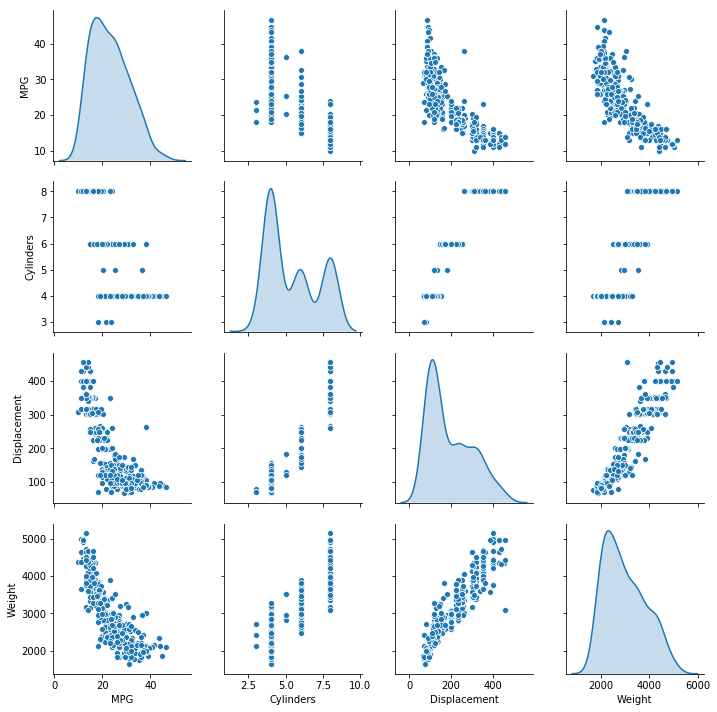

In [13]:
#绘制KDE图
sns.pairplot(train_dataset[["MPG","Cylinders","Displacement","Weight"]],diag_kind="kde")

In [14]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,1.123567,0.873182,0.0,0.00,1.8,1.80,1.8
Europe,314.0,0.321019,0.690143,0.0,0.00,0.0,0.00,1.8
China,314.0,0.355414,0.717681,0.0,0.00,0.0,0.00,1.8


In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [0]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
      layers.Dense(64, activation=tf.nn.relu),
      layers.Dense(1)
  ])
  
  optimizer = tf.keras.optimizers.RMSprop(0.001)#优化器
  
  model.compile(loss='mse',
               optimizer = optimizer,
               metrics=['mae','mse'])
  return model

In [22]:
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [23]:
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [24]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.17937374],
       [ 0.18091431],
       [ 0.34480053],
       [ 0.6249267 ],
       [ 0.67920387],
       [ 0.11369695],
       [ 0.6968455 ],
       [ 0.5142491 ],
       [-0.12214226],
       [ 0.28820097]], dtype=float32)

In [26]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
      if epoch % 100 == 0:
        print('')
      print('.',end='')

EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose = 0,
    callbacks = [PrintDot()])


Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................

# 保存历史对象

In [27]:
hist = pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.167540,0.933577,2.167540,8.599531,2.287972,8.599531,995
996,2.170966,0.890917,2.170966,8.913916,2.314088,8.913917,996
997,2.136769,0.911578,2.136769,8.463322,2.234575,8.463322,997
998,2.183061,0.917478,2.183061,8.316945,2.228911,8.316945,998
999,2.168625,0.910162,2.168625,8.442331,2.245399,8.442331,999


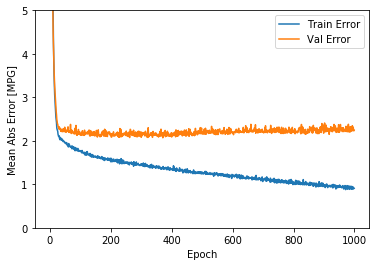

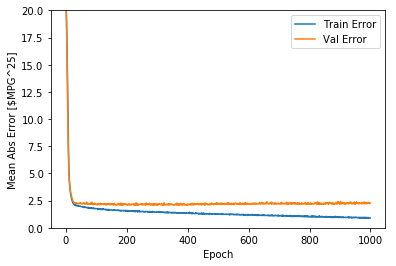

In [28]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'],hist['mean_absolute_error'],
               label='Train Error')
  plt.plot(hist['epoch'],hist['val_mean_absolute_error'],
                label='Val Error')
  plt.legend()
  plt.ylim([0,5])
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [$MPG^25]')
  plt.plot(hist['epoch'],hist['mean_absolute_error'],
               label='Train Error')
  plt.plot(hist['epoch'],hist['val_mean_absolute_error'],
                label='Val Error')
  plt.legend()
  plt.ylim([0,20])
  
  
plot_history(history)

可以发现绿色的曲线正在上升，这是过拟合，it is not good.

# 解决过拟合
使用early_stopping


...................................................................

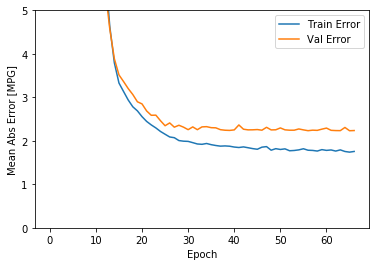

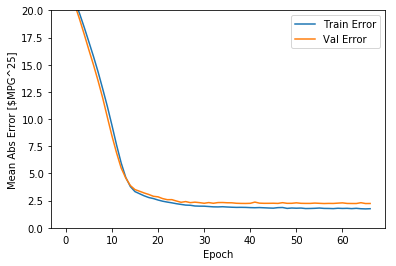

In [30]:
model = build_model()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(normed_train_data,train_labels,epochs=EPOCHS,
                   validation_split = 0.2,verbose = 0,callbacks=[early_stop,PrintDot()])
plot_history(history)

# 观察平均绝对误差

In [31]:
loss,mae,mse = model.evaluate(normed_test_data,test_labels,verbose=0)
print("Testing set Mean Abs Error:{:5.2f} MPG".format(mae))

Testing set Mean Abs Error: 1.84 MPG


# 绘制散点图

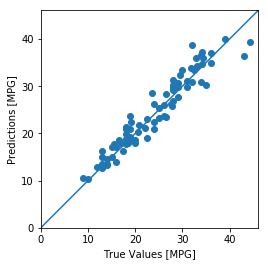

In [32]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels,test_predictions)
plt.xlabel("True Values [MPG]")
plt.ylabel("Predictions [MPG]")
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])

_=plt.plot([-100,100],[-100,100])

# 绘制直方图


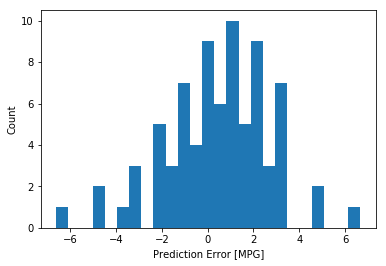

In [36]:
error = test_predictions - test_labels
plt.hist(error,bins = 25)
plt.xlabel("Prediction Error [MPG]")
_=plt.ylabel("Count")